In [11]:
import xarray as xr 
import xarray as dt 

import sys 
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.data_wrangling as data
import functions.eddy_feedback as ef 
import functions.plotting as plot 

# REGRID

In [12]:
## FIRST  (INCOMPLETE)
# ds = xr.open_mfdataset('/disco/share/sit204/data_isca_intel_maths2/soc_ga3_do_simple_false_cmip_o3_bucket_qflux_co2_400_mid_alb_gfort_mm_mp/atmos_daily_interp_10_years.nc',
#                        parallel=True, chunks={'time': 30})

## FULLY JACKED
# ds = xr.open_mfdataset('/disco/share/sit204/data_isca_intel_maths2/soc_ga3_do_simple_false_cmip_o3_bucket_qflux_co2_400_mid_alb_gfort_mm_mp/atmos_daily_interp_40_years_efp.nc',
#                        parallel=True, chunks={'time': 30})

# ds 

In [13]:
# # rename components
# rename = {'pfull': 'level', 'ucomp': 'u', 'vcomp': 'v', 'temp': 't'}
# ds = ds.rename(rename) 

# # choose selected variables
# variables = ['u','v','t']
# ds = ds[variables]

# ds = ef.calculate_epfluxes_ubar(ds)
# ds1 = ef.calculate_epfluxes_ubar(ds, primitive=False) 

# ds_new = xr.Dataset(data_vars={'u': ds.u, 'v': ds.v, 't': ds.t, 'ubar': ds.ubar,
#                                'div1_pr': ds.div1, 'div1_qg': ds1.div1,
#                                'ep1_pr': ds.ep1, 'ep2_pr': ds.ep2}) 

# # ds_new = ds_new[['u', 'v', 't', 'ubar', 'div1_pr', 'div1_qg']]

# # primitive dataset
# # ds_new = ds_new[['ubar', 'div1_pr', 'ep1_pr', 'ep2_pr']]
# ds_new

In [14]:
# ds_new.to_netcdf('/home/links/ct715/data_storage/isca/jacked_isca/realistic_V2_uvt_ubar_ep-both.nc') 

# Eddy Feedback Parameter

In [15]:
# ds = xr.open_mfdataset('/home/links/ct715/data_storage/isca/jacked_isca/realistic_uvt_ubar_ep-both.nc')
ds = xr.open_mfdataset('/home/links/ct715/data_storage/isca/jacked_isca/realistic_V2_uvt_ubar_ep-both.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 14761, level: 40, lat: 64, lon: 128)
Coordinates:
  * time     (time) object 0022-01-01 12:00:00 ... 0063-01-01 00:00:00
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * level    (level) float32 0.03 0.16 0.51 1.38 ... 825.0 871.8 921.0 973.1
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(14761, 40, 64, 128), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(14761, 40, 64, 128), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(14761, 40, 64, 128), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(14761, 40, 64), meta=np.ndarray>
    div1_pr  (time, level, lat) float64 dask.array<chunksize=(14761, 40, 64), meta=np.ndarray>
    div1_qg  (time, level, lat) float64 dask.array<chunksize=(14761, 40, 64), meta=np.ndarray>

In [16]:
ds = data.seasonal_mean(ds, cut_ends=False, season='djf')
ds = ds.isel(time=slice(1,-1))
ds

<xarray.Dataset>
Dimensions:  (time: 40, level: 40, lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * level    (level) float32 0.03 0.16 0.51 1.38 ... 825.0 871.8 921.0 973.1
  * time     (time) object 0022-12-01 00:00:00 ... 0061-12-01 00:00:00
Data variables:
    u        (time, level, lat, lon) float32 -1.242 -1.241 ... -0.8717 -0.7938
    v        (time, level, lat, lon) float32 0.1152 0.1073 ... 1.953 1.926
    t        (time, level, lat, lon) float32 261.2 261.2 261.2 ... 255.0 255.0
    ubar     (time, level, lat) float32 -1.093 -2.51 -3.937 ... 1.188 0.674
    div1_pr  (time, level, lat) float64 -0.003185 -0.003804 ... -0.1517 1.512
    div1_qg  (time, level, lat) float64 -0.003185 -0.003804 ... -0.1517 1.512

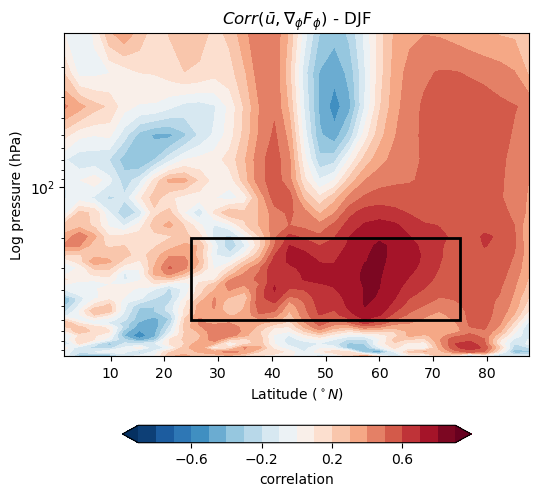

In [17]:
plot.plot_reanalysis_correlation(ds, take_seasonal_mean=False)

In [18]:
efp = ef.calculate_efp(ds, take_seasonal=False, take_level_mean=True)

print(f'The EFP for realistic Isca (DJF) is {efp.values.round(2)}')

Seasonal average has not been calculated.

The EFP for realistic Isca (DJF) is 0.31


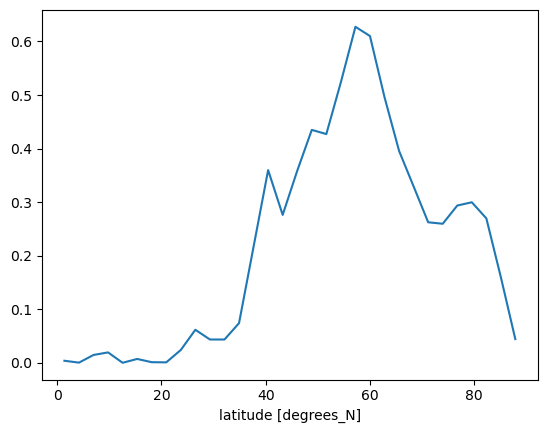

In [19]:
r = ef.calculate_efp_latitude(ds, take_seasonal=False)
r.plot()

# Reanalysis Comparison

In [20]:
jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/seasonal/jra55_seasonal-djf_uvtw_ubar_ep-pr.nc') 
jra = jra.sel(time=slice('1979', '2015'))
jra 

<xarray.Dataset>
Dimensions:  (time: 37, level: 37, lat: 73, lon: 144)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1979-12-01 1980-12-01 ... 2015-12-01
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(37, 37, 73, 144), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(37, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(37, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(37, 37, 73, 144), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(37, 37, 73), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(37, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(37, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(37, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(37, 37, 73), meta=np.ndarray>

Seasonal average has not been calculated.

The JRA55 NH Winter EFP = 0.4


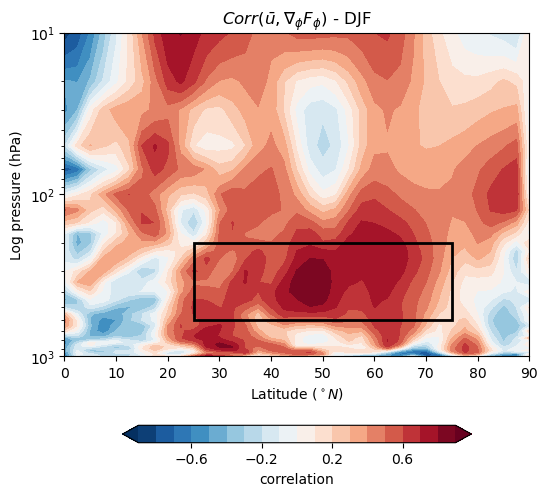

In [21]:
efp_jra55 = ef.calculate_efp(jra, which_div1='div1', take_level_mean=True, take_seasonal=False, flip_latitude=True)
print(f'The JRA55 NH Winter EFP = {efp_jra55.values.round(2)}')

plot.plot_reanalysis_correlation(jra, which_div1='div1')

In [22]:
isca = xr.open_mfdataset('/home/links/ct715/data_storage/isca/jacked_isca/realistic_uvt_ubar_ep_pr.nc')
isca = data.seasonal_mean(isca, cut_ends=False, season='djf')
isca = isca.isel(time=slice(1,-1)) 

rename = {'ep1_pr': 'ep1', 'ep2_pr': 'ep2', 'div1_pr': 'div1'}
isca = isca.rename(rename)
isca 

<xarray.Dataset>
Dimensions:  (time: 9, level: 6, lat: 64)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * level    (level) float32 10.0 100.0 250.0 500.0 850.0 925.0
  * time     (time) object 0022-12-01 00:00:00 ... 0030-12-01 00:00:00
Data variables:
    ubar     (time, level, lat) float32 -1.082 -2.385 -3.578 ... 2.244 1.19
    div1     (time, level, lat) float64 -0.01194 -0.02747 ... -0.1432 0.2986
    ep1      (time, level, lat) float32 -0.004922 -0.04401 ... -0.1471 -0.1597
    ep2      (time, level, lat) float64 -2.068e-05 -3.971e-05 ... -0.004137

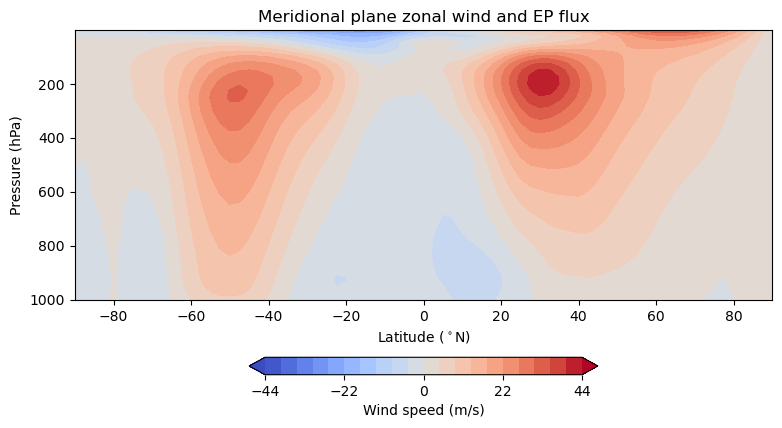

In [23]:
plot.plot_ubar_epflux(jra, skip_lat=2, skip_pres=2, plot_arrows=False)

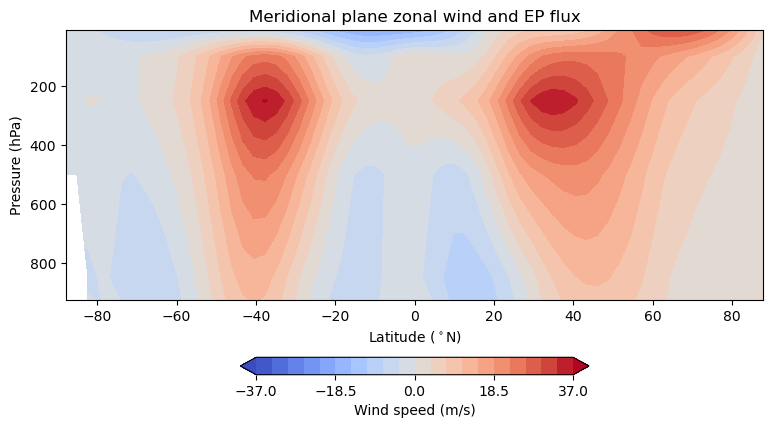

In [24]:
plot.plot_ubar_epflux(isca, plot_arrows=False )

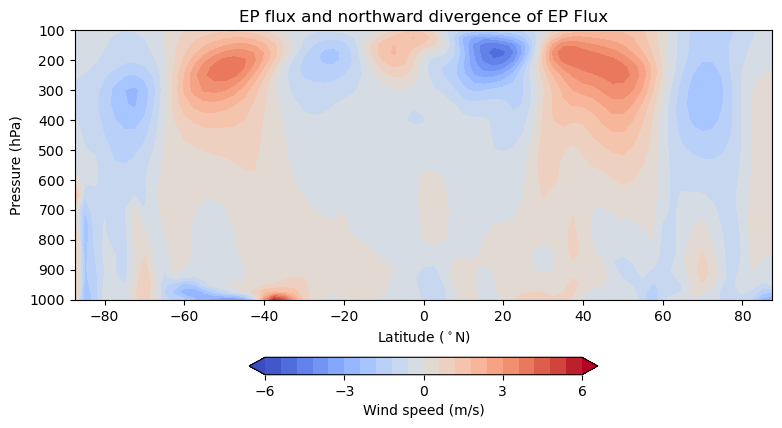

In [25]:
plot.plot_epfluxes_div(jra, skip_lat=2, plot_arrows=False)

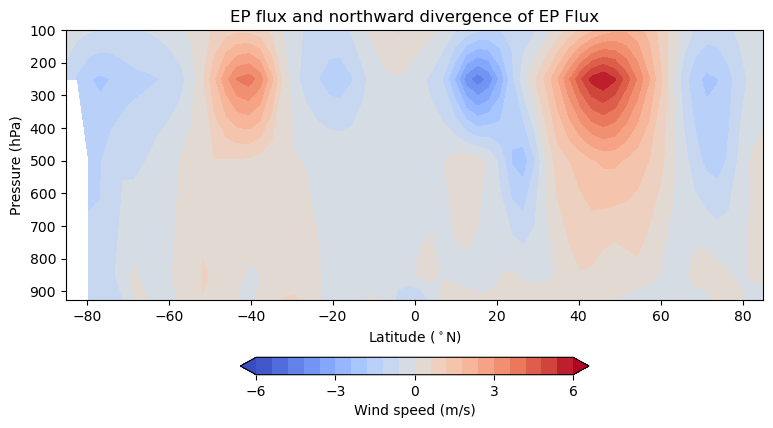

In [26]:
plot.plot_epfluxes_div(isca, plot_arrows=False)